# Проектна задача по предметот Операциони истражувања

## Благој Христов 157/2016


## Нелинеарно програмирање во *Python* - решение на два примери користејќи ја библиотеката *SciPy*

### Прв пример - Поставување на парапет

Првиот пример се однесува на проблем на поставување парапет (ограда) на правоаголна површина.

Во внатрешноста на површината постои празен правоаголен простор со големина од $180m^{2}$. Задачата е да се најде најголемата можна оградена површина околу празниот простор, така што широчината на патеката за пешачење да е еднаква од сите страни, а да се искористат максимално $250m$ ограда.

Графички проблемот е претставен на следната слика:

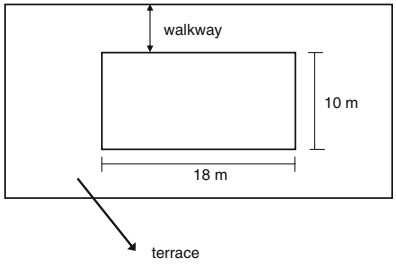

Од описот на проблемот следува дека како одлучувачки променливи може да се земат страните на правоаголната површина која што треба да се огради, односно:

$X_{1}$ - должина на страната на правоаголната површина паралелна на кратката страна на празниот простор (10m), во единица мерка метри.
<br>
$X_{2}$ - должина на страната на правоаголната површина паралелна на долгата страна на празниот простор (18m), во единица мерка метри.

Според главната цел на проблемот, што гласи дека треба да се најде најголемата површина која што може да се огради (без притоа да се нарушат ограничувањата), функцијата на цена на може да се претстави во следниот облик:

$max f = X_{1}X_{2} - 180$, каде $X_{1}X_{2}$ е површината на оградениот правоаголник, додека со $180$ е претставена површината на внатрешниот празен простор.

Ограничувањата на проблемот може да се претстават со следните равенки:

$\dfrac{(X_{1} - 10)}{2} = \dfrac{(X_{2} - 18)}{2}$ - широчината на патеката за пешачење треба да биде еднаква од сите страни.

$2\cdot(X_{1} + X_{2}) + 2\cdot(18 + 10) \leq 250$ - најмногу може да се искористи $250m$ ограда.

$X_{1}, X_{2} \geq 0$ - одлучувачките променливи мора да бидат позитивни или еднакви на нула.

По математичко средување на равенствата, се добива канонската форма на проблемот:

<center>
    <br>
    $max f = X_{1}X_{2} - 180$
    <br><br>
    $0.5X_{1} - 0.5X_{2} + 4 \leq 0$
    <br>
    $-0.5X_{1} + 0.5X_{2} - 4 \leq 0$
    <br>
    $2X_{1} + 2X_{2} + 56 - 250 \leq 0$
</center>

Со користење на овие равенства и со помош на функцијата *basinhopping* од *optimize* блокот на *SciPy* библиотеката, може со *Python* да се најде решението на овој проблем на оптимизација.

*Basinhopping* алгоритамот се користи за наоѓање на глобалниот минимум на одредена функција на тој начин што комбинира алгоритам за глобално чекорење со алгоритам за одредување на локалниот минимум на секој чекор. Функцијата *minimize* од истата библиотека во некои одредени случаи ќе даде локален минимум како решение, а за разлика од неа *basinhopping* алгоритамот гарантира поголема сигурност за пронаоѓање на глобалниот минимум на функцијата која се оптимизира.

Бидејќи алгоритамот кој што се користи врши минимизација на функција, потребно е проблемот да го запишеме во подруг облик, односно максимизирањето на функцијата на цена да премине во минимизирање, така што финалниот облик на проблемот е следниот:

<center>
    <br>
    $min f = -X_{1}X_{2} + 180$
    <br><br>
    $0.5X_{1} - 0.5X_{2} + 4 \leq 0$
    <br>
    $-0.5X_{1} + 0.5X_{2} - 4 \leq 0$
    <br>
    $2X_{1} + 2X_{2} + 56 - 250 \leq 0$
</center>

In [1]:
import numpy as np
from scipy.optimize import basinhopping, NonlinearConstraint

In [2]:
def solve_nlp(dcs_vars, cst_func, bnds, cons):
    
    # поставување на параметри на алгоритамот за минимизација
    minimizer_args={'method': 'SLSQP', 'bounds': bnds, 'constraints': cons}
    
    # решавање на проблемот
    solution = basinhopping(cst_func, dcs_vars, niter=100, minimizer_kwargs=minimizer_args, seed=157)

    # добивање на пресметаните одлучувачки променливи
    x = solution.x

    # добивање на вредноста на функцијата на цена
    cf_value = cst_func(x)
    
    return x, cf_value

In [3]:
# декларирање функција на цена
def cost_function(x):
    return -(x[0] * x[1] - 180)


# декларирање на првото ограничување
def constraint_1(x):
    return (0.5 * x[0] - 0.5 * x[1] + 4)


# декларирање на второто ограничување
def constraint_2(x):
    return (-0.5 * x[0] + 0.5 * x[1] - 4)


# декларирање на третото ограничување
def constraint_3(x):
    return (2 * x[0] + 2 * x[1] + 56 - 250)


# декларирање на одлучувачки променливи
var = np.zeros(2)

# поставување на ограничувања на променливите
bounds = ((0, np.inf), (0, np.inf))

# поставување на ограничувања на проблемот
cons_1 = NonlinearConstraint(constraint_1, lb=-np.inf, ub=0.0)
cons_2 = NonlinearConstraint(constraint_2, lb=-np.inf, ub=0.0)
cons_3 = NonlinearConstraint(constraint_3, lb=-np.inf, ub=0.0)
constraints = ([cons_1,cons_2, cons_3])

decision_vars, cost_function_value = solve_nlp(dcs_vars=var, cst_func=cost_function, bnds=bounds, cons=constraints)

# добивање на ширината на патеката за пешачење
walkway_width = (decision_vars[0] - 10) / 2

# принтање на вредноста на функцијата на цена
print('Оградената површина изнесува {:.2f} m\u00b2, а ширината на патеката за пешачење е {:.2f} m.\n'.format(-cost_function_value, walkway_width))

# принтање на вредноста на одлучувачките променливи
print('Одлучувачки променливи:')
print('X\N{SUBSCRIPT ONE} = {:.2f} m'.format(decision_vars[0]))
print('X\N{SUBSCRIPT TWO} = {:.2f} m'.format(decision_vars[1]))

Оградената површина изнесува 2156.25 m², а ширината на патеката за пешачење е 17.25 m.

Одлучувачки променливи:
X₁ = 44.50 m
X₂ = 52.50 m


### Анализа на чувствителност

Дополнително за конкретниот проблем, може да се направи и анализа на чувствителност.

Единствената примена каде би имала смисла оваа постапка е во третото ограничување, односно до колку метри може да се намали дозволената должина на оградата:

In [4]:
import sympy as sym
from sympy.solvers.inequalities import reduce_rational_inequalities

d = sym.Symbol('\u0394', real='True')
x1 = sym.Symbol('x1', real='True')
x2 = sym.Symbol('x2', real='True')

solution_constraint_3 = sym.solve((0.5 * x1 - 0.5 * x2 + 4,
                                  -0.5 * x1 + 0.5 * x2 - 4,
                                   2 * x1 + 2 * x2 + 56 - 250 + d), (x1, x2, d))

print('Доколку се промени дозволената должина на ограда, основните променливи се следните:', solution_constraint_3)

constraint_3_range = reduce_rational_inequalities([[solution_constraint_3[x1] >= 0, solution_constraint_3[x2] >= 0]], d)

print('\nПромената \u0394 која се појавува во ограничувањето мора да го задоволи следниот услов:', constraint_3_range)

Доколку се промени дозволената должина на ограда, основните променливи се следните: {x2: 52.5 - 0.25*Δ, x1: 44.5 - 0.25*Δ}

Промената Δ која се појавува во ограничувањето мора да го задоволи следниот услов: Δ <= 178.0


Според добиените резултати, должината на оградата би можела да се намали до $250 - \Delta = 72m$

Доколку се промени ограничувањето според оваа величина, се добива следното решение на проблемот:

In [5]:
# декларирање функција на цена
def cost_function(x):
    return -(x[0] * x[1] - 180)


# декларирање на првото ограничување
def constraint_1(x):
    return 0.5 * x[0] - 0.5 * x[1] + 4


# декларирање на второто ограничување
def constraint_2(x):
    return -0.5 * x[0] + 0.5 * x[1] - 4


# декларирање на третото ограничување
def constraint_3(x):
    return 2 * x[0] + 2 * x[1] + 56 - 72


# декларирање на одлучувачки променливи
var = np.zeros(2)

# поставување на ограничувања на променливите
bounds = ((0, np.inf), (0, np.inf))

# поставување на ограничувања на проблемот
cons_1 = NonlinearConstraint(constraint_1, lb=-np.inf, ub=0)
cons_2 = NonlinearConstraint(constraint_2, lb=-np.inf, ub=0)
cons_3 = NonlinearConstraint(constraint_3, lb=-np.inf, ub=0)
constraints = ([cons_1,cons_2, cons_3])

decision_vars, cost_function_value = solve_nlp(dcs_vars=var, cst_func=cost_function, bnds=bounds, cons=constraints)

# добивање на ширината на патеката за пешачење
walkway_width = (decision_vars[0] - 10) / 2

# принтање на вредноста на функцијата на цена
print('Оградената површина изнесува {:.2f} m\u00b2, а ширината на патеката за пешачење е {:.2f} m.\n'.format(-cost_function_value, walkway_width))

# принтање на вредноста на одлучувачките променливи
print('Одлучувачки променливи:')
print('X\N{SUBSCRIPT ONE} = {:.2f} m'.format(decision_vars[0]))
print('X\N{SUBSCRIPT TWO} = {:.2f} m'.format(decision_vars[1]))

Оградената површина изнесува -180.00 m², а ширината на патеката за пешачење е -5.00 m.

Одлучувачки променливи:
X₁ = 0.00 m
X₂ = 8.00 m


Може да се забележи дека, како што покажа и анализата на чувствителност, ова е минимално што може да се намали дозволената должина на оградата, бидејќи одлучувачката променлива $X_{1}$ добива вредност $0m$.

Но, исто така може да се забележи дека добиената површина како и ширината на патеката за пешачење добива негативна вредност, што е невозможно. Ова е поради тоа што должините на страните на надворешниот правоаголник, односно одлучувачките променливи, се помали од должините на внатрешниот празен простор.

За да се добие вистинската минимална дозволена должина на оградата, потребно е дополнително да се вметне и ограничувањето дека површината на надворешниот правоаголник мора да е поголема од површината на внатрешниот празен простор:

In [6]:
import sympy as sym
from sympy.solvers.inequalities import reduce_rational_inequalities

d = sym.Symbol('\u0394', real='True')
x1 = sym.Symbol('x1', real='True')
x2 = sym.Symbol('x2', real='True')

solution_constraint_3 = sym.solve((0.5 * x1 - 0.5 * x2 + 4,
                                  -0.5 * x1 + 0.5 * x2 - 4,
                                   x1 * x2 - 180,
                                   2 * x1 + 2 * x2 + 56 - 250 + d), (x1, x2, d))

print('Доколку се промени дозволената должина на ограда, основните променливи се следните:', solution_constraint_3)

Доколку се промени дозволената должина на ограда, основните променливи се следните: [(-18.0000000000000, -10.0000000000000, 250.000000000000), (10.0000000000000, 18.0000000000000, 138.000000000000)]


Според добиените резултати постојат само две можни решенија, а тоа се:

$X_{1} = -18m$
<br>
$X_{2} = -10m$
<br>
$\Delta = 250$

Ова решение е невозможно бидејќи $X_{1}, X_{2} \geq 0$

$X_{1} = 10m$
<br>
$X_{2} = 18m$
<br>
$\Delta = 138$

Според ова решение може да се воочи дека $X_{1}$ и $X_{2}$ се со иста должина како и страните на внатрешниот празен простор, што значи дека навистина е минималната дозволена должина на оградата, која би изнесувала $250 - \Delta = 112m$, иако не е реалистично решение бидејќи во овој случај површината на патеката за пешачење би била $0m$. Следствено на ова, може да се заклучи дека $\Delta \leq 138$, односно најмалку може да се употреби $112m$ ограда.

***

### Втор пример - Планирање на производство во фабрика за пијалоци

Вториот пример во оваа проектна задача се однесува на проблем со планирање на производството во фабрика за пијалоци.

Фабриката произведува два типа на пијалоци базирани на истиот сируп, *Coli* и *Pepsa*, на својата производствена линија *S1*.

- По процесирањето, секој хектолитар на сируп произведува **40** единици со шишиња од 1.5l од пијалокот *Coli* и **20** единици со шишиња од 1.5l од пијалокот *Pepsa*. 
- Секој хектолитар на сируп ја кошта фирмата по **$150** за набавка и процесирање.
- Производствената линија за пакување има капацитет за производство на **7,100** единици од 1.5l шишиња на секој час.
- Фирмата работи **5 дена** во неделата по **8 часа** на ден.
- Според неделната побарувачка, количеството на произведени единици од пијалокот *Pepsa* треба да биде барем половина од количеството на произведени единици од пијалокот *Coli*.

Целта на решавање на овој проблем е да се добие оптималното дневно количество на произведени единици за секој од пијалоците, така што фирмата ќе го максимизира својот профит.

Од описот на проблемот следува дека како одлучувачки променливи може да се земе бројот на произведени единици од поединечните пијалоци, односно:

$X_{1}$ - број на произведени единици од пијалокот *Coli*.
<br>
$X_{2}$ - број на произведени единици од пијалокот *Pepsa*.

Функцијата на цена е дадена во самиот проблем, односно таа претставува проценка на дневниот приход кој што го очекува фирмата минус потребните трошоци за набавување и процесирање на сирупот: 


<center>
<br>
$max f = 49000X_{1} - X_{1}^2 + 30X_{2} - 2X_{2}^2 - 150\cdot(40X_{1} + 20X_{2})$
</center>

Ограничувањата на проблемот може да се претстават со следните равенки:

$X_{1} + X_{2} \leq 56800$ - вкупното количество на произведени единици мора да биде реално остварливо (7,100 единици на час, 8 часа на ден).

$X_{2} \geq \dfrac{X_{1}}{2}$ - количеството на произведени единици од пијалокот *Pepsa* треба да биде барем половина од количеството на единици од пијалокот *Coli*.

$X_{1}, X_{2} \geq 0$ - одлучувачките променливи мора да бидат позитивни или еднакви на нула.

По математичко средување на равенствата, се добива канонската форма на проблемот:

<center>
<br>
$max f = 43000X_{1} - X_{1}^2 - 2970X_{2} - 2X_{2}^2$
<br><br>
$X_{1} + X_{2} - 56800 \leq 0$
<br>
$X_{1} - 2X_{2} \leq 0$
</center>

Бидејќи алгоритамот кој што се користи врши минимизација на функција, потребно е проблемот да го запишеме во подруг облик, односно максимизирањето на функцијата на цена да премине во минимизирање, така што финалниот облик на проблемот е следниот:

<center>
<br>
$min f = -43000X_{1} + X_{1}^2 + 2970X_{2} + 2X_{2}^2$
<br><br>
$X_{1} + X_{2} - 56800 \leq 0$
<br>
$X_{1} - 2X_{2} \leq 0$
</center>

За решавање на проблемот повторно ја користиме функцијата *basinhopping*:

In [106]:
# декларирање функција на цена
def cost_function(x):
    return -43000*x[0] + x[0]**2 + 2970*x[1] + 2*x[1]**2


# декларирање на првото ограничување
def constraint_1(x):
    return x[0] + x[1] - 56800


# декларирање на второто ограничување
def constraint_2(x):
    return x[0] - 2 * x[1]


# декларирање на одлучувачки променливи
var = np.zeros(2)

# поставување на ограничувања на променливите
bounds = ((0, np.inf), (0, np.inf))

# поставување на ограничувања на проблемот
cons_1 = NonlinearConstraint(constraint_1, lb=-np.inf, ub=0)
cons_2 = NonlinearConstraint(constraint_2, lb=-np.inf, ub=0)
constraints = ([cons_1, cons_2])

decision_vars, cost_function_value = solve_nlp(dcs_vars=var, cst_func=cost_function, bnds=bounds, cons=constraints)

# принтање на вредноста на функцијата на цена
print('Остварениот профит на фирмата ќе изнесува: {:.2f}\n'.format(-cost_function_value))

# принтање на вредноста на одлучувачките променливи
print('Одлучувачки променливи:')
print('X\N{SUBSCRIPT ONE} = {:.2f} единици'.format(decision_vars[0]))
print('X\N{SUBSCRIPT TWO} = {:.2f} единици'.format(decision_vars[1]))

Остварениот профит на фирмата ќе изнесува: 287514496.15

Одлучувачки променливи:
X₁ = 13841.84 единици
X₂ = 6912.26 единици


### Анализа на чувствителност

За овој проблем, анализата на чувствителност ќе се изведе со користење на ***Kuhn-Tucker*** условите. 

Преку оваа постапка може целосно да се реши проблемот, без користење на апроксимирачки алгоритми што се користеа до сега. Покрај тоа, на овој начин се добиваат и дополнителни информации за проблемот кои што се корисни за анализата на чувствителност.

Постапката е базирана на користење на Лагранжова функција и поставување на т.н. *Kuhn-Tucker*-ови услови кои мораат да бидат исполнети. На крај решавањето се сведува на решавање на систем равенки, што не е тешко да се изведе.

In [107]:
import sympy as sym

l1 = sym.Symbol('\u03BB_1', real='True')
l2 = sym.Symbol('\u03BB_2', real='True')
x1 = sym.Symbol('x1', real='True')
x2 = sym.Symbol('x2', real='True')

# декларирање на Лагранжовата функција, што претставува збир од функцијата на цена со секој од условите помножени 
# со соодветен Лагранжов мултипликатор
L = -43000*x1 + x1**2 + 2970*x2 + 2*x2**2 + l1*(x1 + x2 - 56800) + l2*(x1 - 2 * x2)

# услови на Kuhn-Tucker

# услов на градиент
dLx1 = L.diff(x1)
dLx2 = L.diff(x2)

# услов на изводливост
f1 = x1 + x2 - 56800
f2 = x1 - 2*x2

# услов на ортогоналност
o1 = l1*(x1 + x2 - 56800)
o2 = l2*(x1 - 2*x2)

За да се реши проблемот, треба да се претпостават вредностите на Лагранжовите мултипликатори:

**1)** $\lambda_1 = \lambda_2 = 0$

Од условот на градиент следува:

In [108]:
var_1 = sym.solve(dLx1.subs({l1: 0, l2: 0}), x1)  
var_2 = sym.solve(dLx2.subs({l1: 0, l2: 0}), x2)

print('x1 = {}\nx2 = {}'.format(float(var_1[0]), float(var_2[0])))

x1 = 21500.0
x2 = -742.5


Од овие вредности може да се забележи дека променливата $X_{1}$ е во ред, но променливата $X_{2}$ добива негативна вредност, што не е дозволено.

Поради ова, наредно ќе се претпостават следните вредности за Лагранжовите мултипликатори:

**2)** $\lambda_1 = 0; \lambda_2 \neq 0$

Од условот на градиент следува:

In [109]:
eq_1 = sym.solve(dLx1.subs(l1, 0), x1)[0]
eq_2 = sym.solve(dLx2.subs(l1, 0), x2)[0]

print('x1 = {}\nx2 = {}'.format(eq_1, eq_2))

x1 = 21500 - λ_2/2
x2 = λ_2/2 - 1485/2


Може да се воочи дека сега како резултат на замената се добиваат две равенки со три непознати. 

За да може да се најдат решенијата на равенките, потребно е да се добие уште една равенка која ги содржи двете променливи. Тоа може да се оствари со заменување на претпоставените вредности за Лагранжовите мултипликатори во останатите услови на *Kuhn-Tucker*.

Бидејќи $\lambda_{1} = 0$, единствена равенка која што може да се искористи е вториот ортогонален услов, односно:

In [110]:
eq_3 = o2

solution = sym.solve((eq_1 - x1, eq_2 - x2, eq_3 - 0), (x1, x2, l2))

print(solution)

[(41515/3, 41515/6, 45970/3), (21500, -1485/2, 0)]


Бидејќи во едно од можните решенија променливата $X_{2}$ има негативна вредност, решението се зема за невозможно, па вистинското решение на проблемот е:

In [111]:
x1_s, x2_s, l2_s = solution[0]

print('X\N{SUBSCRIPT ONE} = {}\nX\N{SUBSCRIPT TWO} = {}\n\u03BB\N{SUBSCRIPT TWO} = {}'.format(float(x1_s), float(x2_s), float(l2_s)))

X₁ = 13838.333333333334
X₂ = 6919.166666666667
λ₂ = 15323.333333333334


Како што може да се забележи, резултатите се скоро еднакви со оние добиени со апроксимирачко минимизирање на функцијата на цена користејќи го *basinhopping* алгоритамот.

За разлика од претходниот метод, овде имаме и податок за Лагранжовите мултипликатори $\lambda_{1}$ и $\lambda_{2}$, што не претставуваат ништо друго туку скриените цени или *shadow prices* на ограничувањата во проблемот.

Според тоа, може да заклучиме дека бидејќи $\lambda_{1} = 0$, фирмата нема да има корист од додавање на повеќе работни часови во денот, бидејќи не се искористени ни тие што веќе ги има на располагање. Тоа може да се потврди и со едноставна проверка:

<center>
    <br>
    $X_{1} + X_{2} = 13838 + 6919 = 20757 < 56800$
</center>

Од $\lambda_{2} = 15323$ може да се увиди дека за секоја дополнителна произведена единица од пијалокот *Coli*, дневниот профит би се зголемил за ***$15,323***.